C:\Users\21658\AppData\Local\Temp\ipykernel_13524\1972681665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


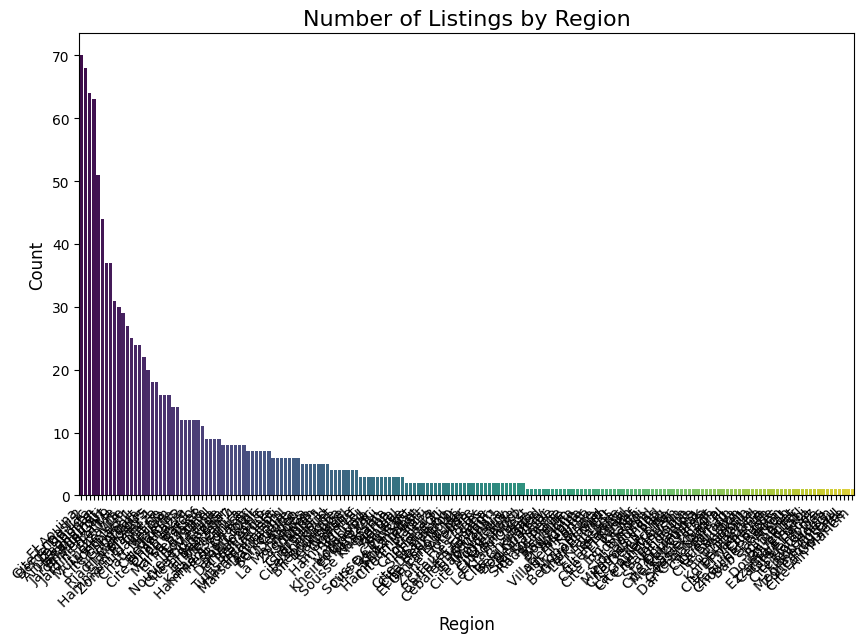

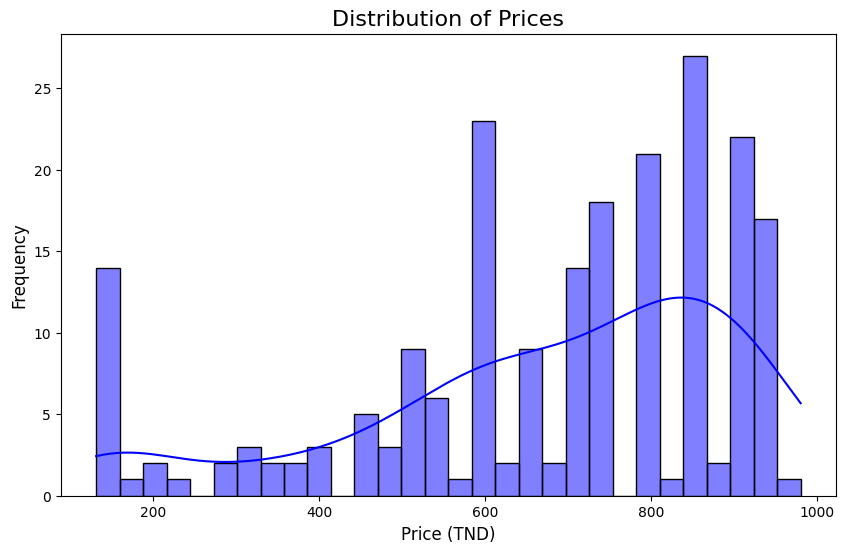

C:\Users\21658\AppData\Local\Temp\ipykernel_13524\1972681665.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='coolwarm')


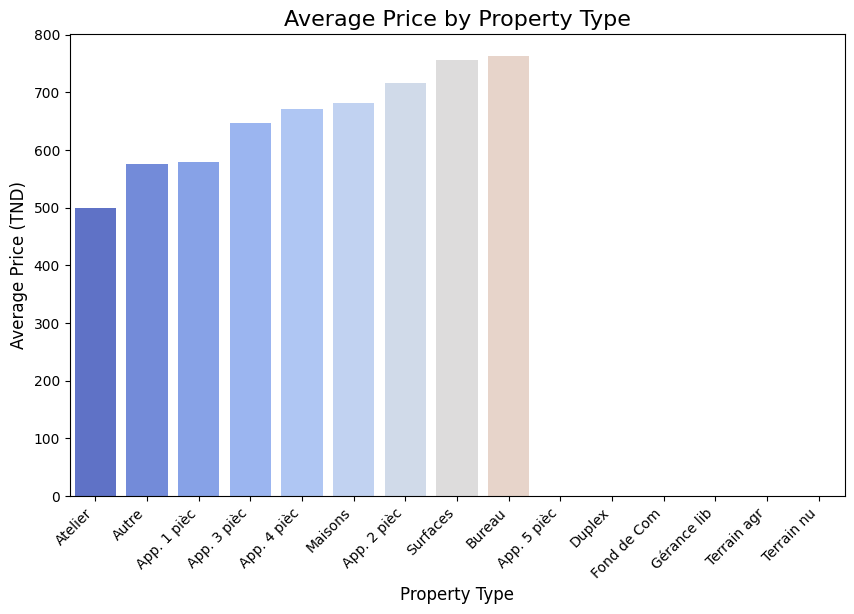

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv("real_estate_data_version_2.csv")

# Preprocess the data
data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')  # Convert "Prix" to numeric
data['Modifiée'] = pd.to_datetime(data['Modifiée'], errors='coerce')  # Convert "Modifiée" to datetime

# Plot 1: Bar plot of counts of listings by "Région"
plt.figure(figsize=(10, 6))
region_counts = data['Région'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title("Number of Listings by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 2: Distribution of prices ("Prix")
plt.figure(figsize=(10, 6))
sns.histplot(data['Prix'].dropna(), kde=True, color='blue', bins=30)
plt.title("Distribution of Prices", fontsize=16)
plt.xlabel("Price (TND)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Plot 3: Average price by "Type"
plt.figure(figsize=(10, 6))
avg_price_by_type = data.groupby("Type")['Prix'].mean().sort_values()
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='coolwarm')
plt.title("Average Price by Property Type", fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Average Price (TND)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



In [18]:
# Charger les données brutes
data = pd.read_csv("real_estate_data_version_2.csv")

# Aperçu des premières lignes
print("Aperçu des premières lignes")
print('\n')
print(data.head())
print('\n')
print("*************")

# Résumé statistique des données numériques
print("Résumé statistique des données numériques")
print('\n')

print(data.describe())

print('\n')
print("*************")

# Résumé des données catégoriques
print("Résumé des données catégoriques")
print('\n')

print(data.describe(include='object'))

print('\n')
print("*************")

Aperçu des premières lignes


            Région    Nature         Type             Texte annonce  \
0         Hammamet     Vente      Maisons      Villa a hammamet sud   
1    Cite Ennasr 2     Vente      Maisons      Villa avec piscine a   
2    Le Kram Ouest  Location  App. 2 pièc      Appartement s plus 1   
3  Jardins d'el Me  Location      Maisons  Étage de villa s 4 jardi   
4    Cite Ennasr 2  Location  App. 2 pièc  Un appart s 1 à cité nas   

         Prix    Modifiée  
0  15 000 000  04/12/2024  
1  13 000 000  04/12/2024  
2         370  04/12/2024  
3       1 800  04/12/2024  
4         860  04/12/2024  


*************
Résumé statistique des données numériques


           Région    Nature     Type                  Texte annonce   Prix  \
count        1250      1250     1250                           1250   1250   
unique        186         5       15                           1178    349   
top     El Aouina  Location  Maisons  Bel appartement s 2 meublé ma  1 200   
fre

In [19]:
# Convertir Prix en numérique (remplacer les espaces ou caractères non numériques)
data['Prix'] = pd.to_numeric(data['Prix'].str.replace(' ', ''), errors='coerce')

print("Statistiques complets pour les prix !")
print('\n')
print("*************")

# Statistiques descriptives pour les colonnes numériques
print(data['Prix'].describe())

print('\n')
print("*************")

# Statistiques personnalisées

mean_price = data['Prix'].mean()
median_price = data['Prix'].median()
std_price = data['Prix'].std()
print(f"Moyenne : {mean_price}, Médiane : {median_price}, Écart-type : {std_price}")


Statistiques complets pour les prix !


*************
count    1.247000e+03
mean     2.846251e+05
std      9.850462e+05
min      1.310000e+02
25%      1.200000e+03
50%      3.500000e+03
75%      2.482000e+05
max      1.550000e+07
Name: Prix, dtype: float64


*************
Moyenne : 284625.0617481957, Médiane : 3500.0, Écart-type : 985046.219538481


                    Prix  Nature_Encoded  Type_Encoded
Prix            1.000000        0.353570      0.193668
Nature_Encoded  0.353570        1.000000      0.192245
Type_Encoded    0.193668        0.192245      1.000000


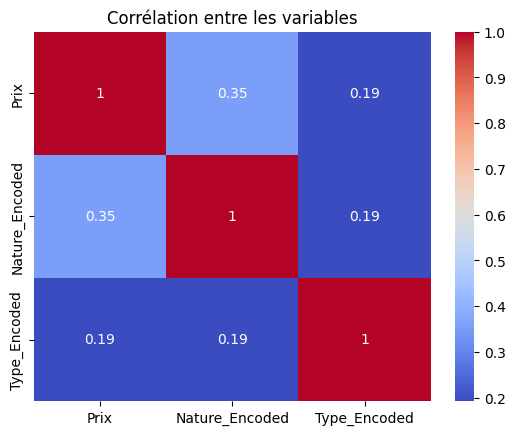

In [20]:
# Encodage des colonnes catégoriques (si pertinent)
data['Nature_Encoded'] = data['Nature'].astype('category').cat.codes
data['Type_Encoded'] = data['Type'].astype('category').cat.codes

# Corrélation entre Nature, Type et Prix
correlations = data[['Prix', 'Nature_Encoded', 'Type_Encoded']].corr()
print(correlations)

# Heatmap pour visualiser
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables")
plt.show()


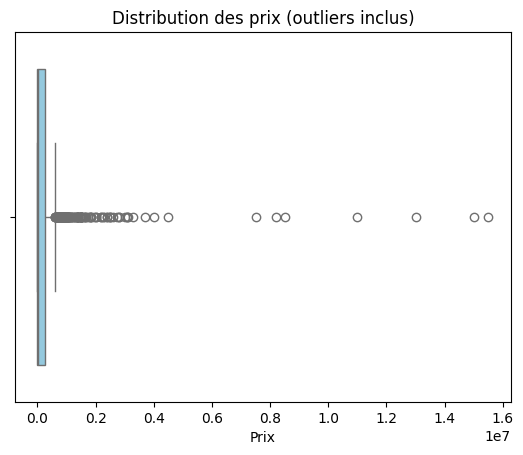

In [21]:
# Boîte à moustaches pour identifier les outliers
sns.boxplot(data=data, x='Prix', color="skyblue")
plt.title("Distribution des prix (outliers inclus)")
plt.show()


Valeurs manquantes par colonne :
 Région            0
Nature            0
Type              0
Texte annonce     0
Prix              3
Modifiée          0
Nature_Encoded    0
Type_Encoded      0
dtype: int64


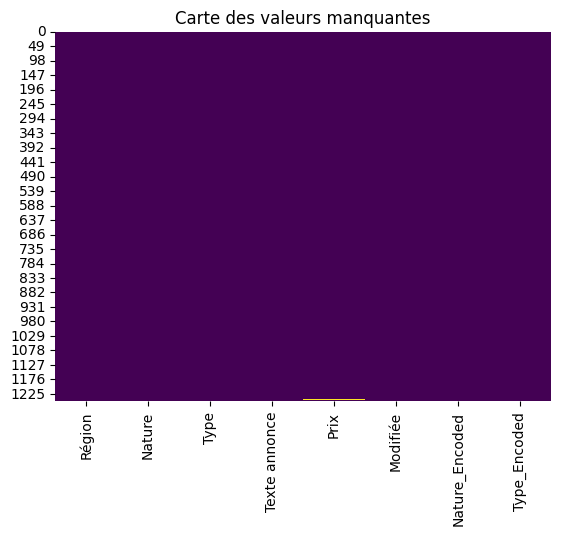

In [22]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Visualisation des valeurs manquantes
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des valeurs manquantes")
plt.show()


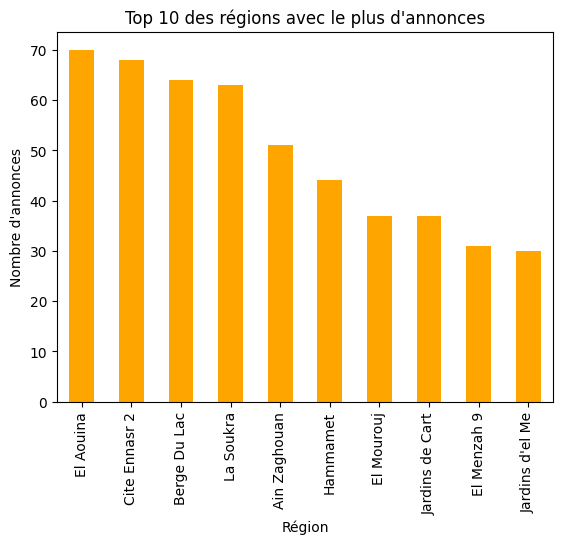

In [23]:
# Répartition des annonces par région
top_regions = data['Région'].value_counts().head(10)
top_regions.plot(kind='bar', color='orange')
plt.title("Top 10 des régions avec le plus d'annonces")
plt.ylabel("Nombre d'annonces")
plt.show()
